In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import json
import requests

In [3]:
def date_close_plot(data_frame):
    labels = []
    ticks = []
    
    prev = pd.Timestamp(data_frame['date'][0])
    prev_year = prev.year ##
    count = 0

    for row in data_frame['date']: ##

        date = pd.Timestamp(row)
        year = date.year

        if year != prev_year:
            labels.append(year)
            ticks.append(row)

        prev_year = year


    # Creating the Time Series chart.
    x_values = data_frame["date"] ##
    y_values = data_frame["close"] ##

    plt.figure(figsize=(20,10))
    plt.plot(x_values, y_values)
    plt.xticks(ticks, labels = labels)

    plt.title(str(data_frame["symbol"][0]) + " Yearly Chart", size = 15)
    plt.xlabel("YEAR", size = 14)
    plt.ylabel(str(data_frame["symbol"][0]), size = 14)

    plt.grid()
    plt.show()


In [4]:
def join_and_graph(data_frame1,data_frame2):
    
    joined_df = data_frame1.merge(data_frame2, on="date")
    clean_df = joined_df[["date","symbol_x","close_x","symbol_y","close_y"]]
    
    x_values = clean_df["close_x"]
    y_values = clean_df["close_y"]
    symbol_x = clean_df["symbol_x"][1]
    symbol_y = clean_df["symbol_y"][1]
    
    plt.figure(figsize = (20,10))
    plt.scatter(x_values,y_values, edgecolors = "black")
    
    plt.title(f"Relationship Between {symbol_x} and {symbol_y}", size = 15)
    plt.xlabel(symbol_x, size = 14)
    plt.ylabel(symbol_y, size = 14)
    
    slope, interception, r_value, p_value, std_err = st.linregress(x_values, y_values)
    
    line_eq = x_values * slope + interception
    plt.plot(x_values, line_eq, color = 'r')
    line_equation = f"y = {round(slope,2)}x + {round(interception,2)}"
    plt.annotate(line_equation,(min(x_values),max(y_values)),fontsize = 15, color = 'red')
    
    print(f"The correlation coefficient between {symbol_x} and {symbol_y} is {round(st.pearsonr(x_values,y_values)[0],2)}")
    
    plt.show()

In [5]:
file = "Resources/"

In [6]:
oil_df = pd.read_csv(file + "oil_csv.csv")
oil_df

,date,symbol,open,high,low,close,daily change (%)
0,2011-04-21,OIL,49.94,50.3500,49.90,50.35,0.820985
1,2011-04-25,OIL,50.57,50.5700,49.91,50.05,-1.028278
2,2011-04-26,OIL,50.18,50.4300,50.10,50.30,0.239139
3,2011-04-27,OIL,50.35,50.8500,49.80,50.81,0.913605
4,2011-04-28,OIL,50.78,51.1600,50.17,50.70,-0.157542
...,...,...,...,...,...,...,...
2965,2023-02-02,OIL,29.06,29.2882,28.70,28.85,-0.722643
2966,2023-02-03,OIL,28.94,29.6500,27.95,27.95,-3.420871
2967,2023-02-06,OIL,28.29,28.4700,27.63,28.47,0.636267
2968,2023-02-07,OIL,28.52,29.5000,28.52,29.50,3.436185


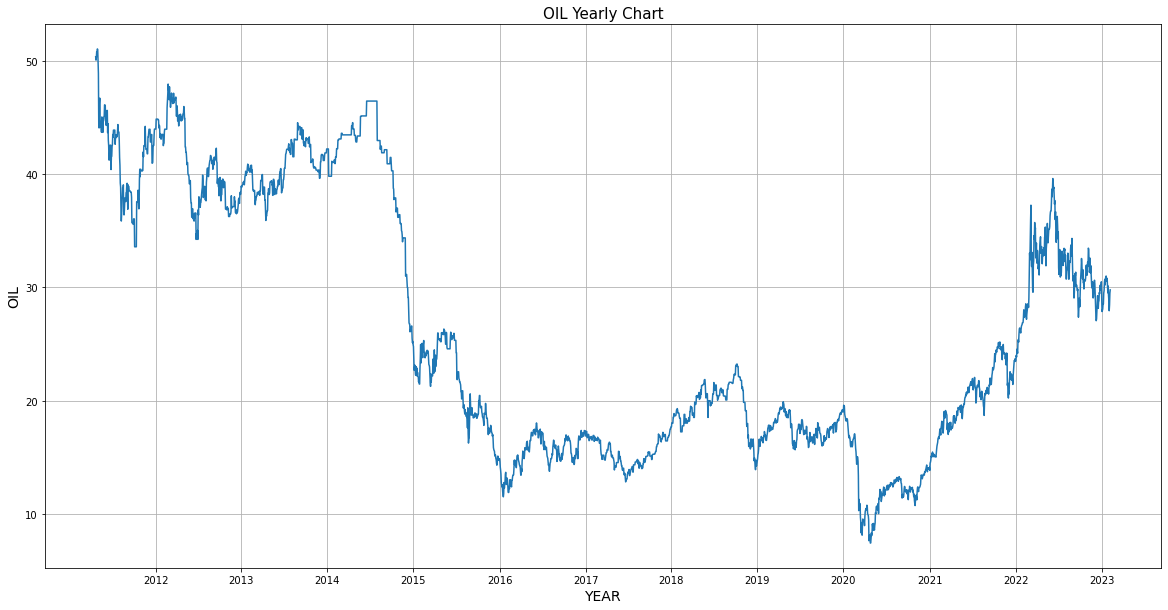

In [7]:
date_close_plot(oil_df)

In [8]:
gold_df = pd.read_csv(file+"gold_csv.csv")
gold_df

,date,symbol,open,high,low,close,daily change (%)
0,1999-11-01,GOLD,18.00,18.060,17.56,17.81,-1.055556
1,1999-11-02,GOLD,17.81,18.250,17.63,18.25,2.470522
2,1999-11-03,GOLD,18.19,18.250,17.75,17.88,-1.704233
3,1999-11-04,GOLD,17.69,17.940,17.56,17.69,0.000000
4,1999-11-05,GOLD,17.56,17.690,17.13,17.19,-2.107062
...,...,...,...,...,...,...,...
5851,2023-02-02,GOLD,20.19,20.190,19.17,19.40,-3.912828
5852,2023-02-03,GOLD,18.80,18.825,18.20,18.32,-2.553191
5853,2023-02-06,GOLD,18.21,18.440,18.11,18.35,0.768808
5854,2023-02-07,GOLD,18.35,18.690,18.19,18.50,0.817439


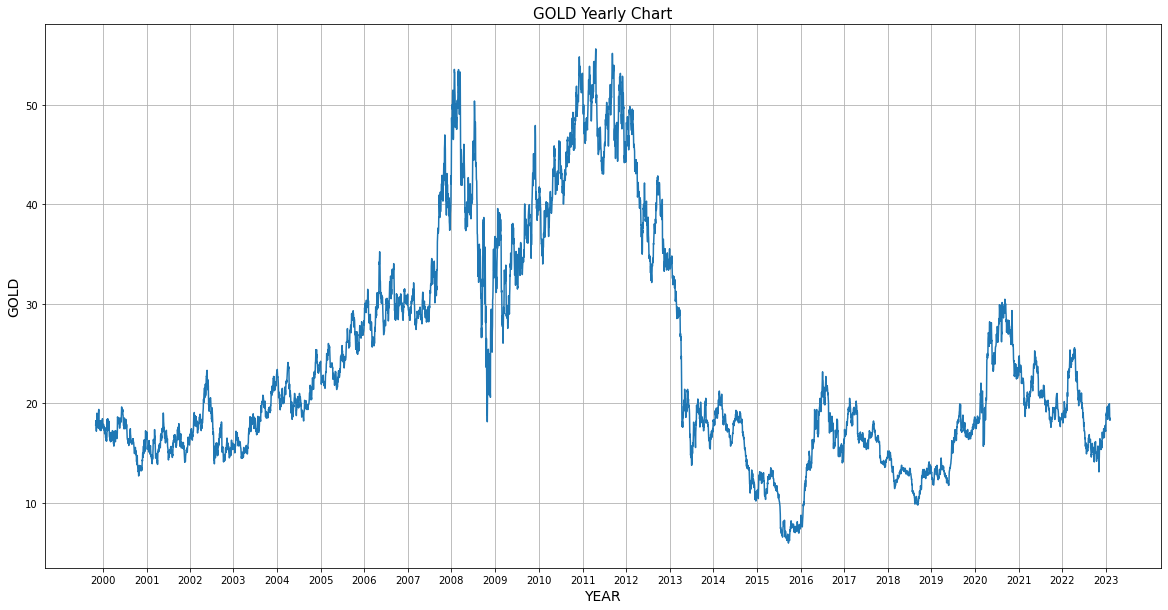

In [9]:
date_close_plot(gold_df)

In [10]:
sp500_df = pd.read_csv(file + "sphq_csv.csv")
sp500_df

,date,symbol,open,high,low,close,daily change (%)
0,2005-12-06,SPHQ,15.47,15.6900,15.4700,15.60,0.840336
1,2005-12-07,SPHQ,15.60,15.6200,15.4200,15.44,-1.025641
2,2005-12-08,SPHQ,15.45,15.5800,15.4390,15.52,0.453074
3,2005-12-09,SPHQ,15.59,15.7400,15.4700,15.57,-0.128287
4,2005-12-12,SPHQ,15.75,15.8000,15.5900,15.67,-0.507937
...,...,...,...,...,...,...,...
4318,2023-02-03,SPHQ,46.70,47.2225,46.6601,46.78,0.171306
4319,2023-02-06,SPHQ,46.54,46.7000,46.3610,46.53,-0.021487
4320,2023-02-07,SPHQ,46.44,47.3400,46.4200,47.21,1.658053
4321,2023-02-08,SPHQ,47.03,47.1500,46.5200,46.58,-0.956836


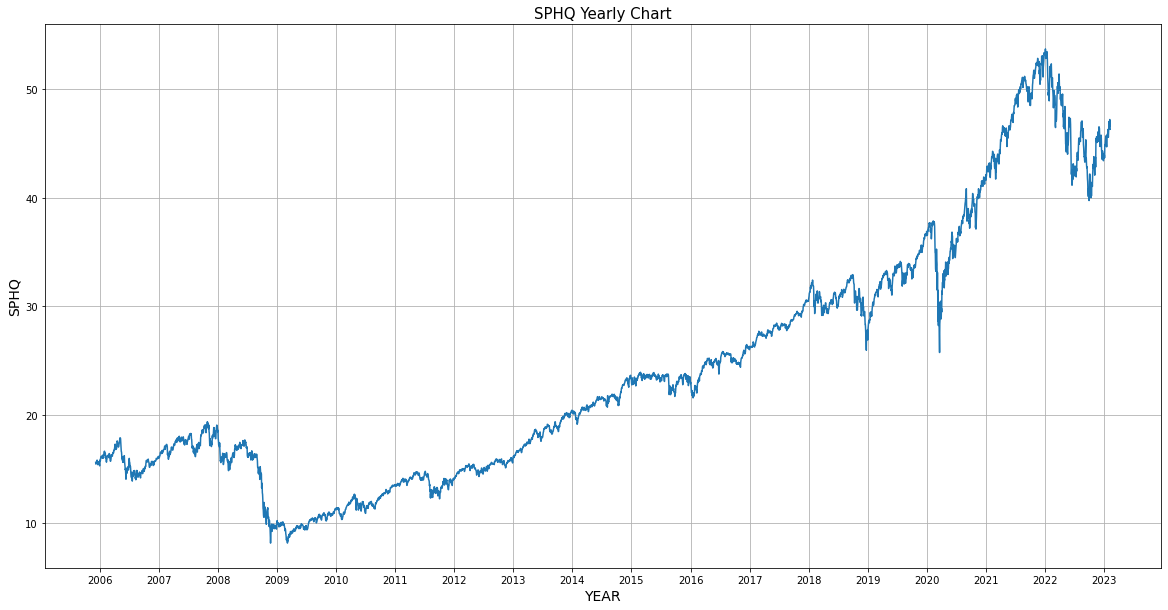

In [11]:
date_close_plot(sp500_df)

In [12]:
bitcoin_df = pd.read_csv(file + "btc_joined.csv")
bitcoin_df

,date,symbol,open,high,low,close,daily change (%)
0,2013-10-01,BTC,124.30466,124.75166,122.56349,123.65499,-0.522643
1,2013-10-02,BTC,123.65499,125.75850,123.63383,125.45500,1.455671
2,2013-10-03,BTC,125.45500,125.66566,83.32833,108.58483,-13.447188
3,2013-10-04,BTC,108.58483,118.67500,107.05816,118.67466,9.292118
4,2013-10-05,BTC,118.67466,121.93633,118.00566,121.33866,2.244793
...,...,...,...,...,...,...,...
3522,2023-02-06,BTC,22932.91000,23158.25000,22628.13000,22762.52000,-0.742993
3523,2023-02-07,BTC,22762.52000,23350.25000,22745.78000,23240.46000,2.099680
3524,2023-02-08,BTC,23242.42000,23452.00000,22665.85000,22963.00000,-1.202198
3525,2023-02-09,BTC,22961.85000,23011.39000,21688.00000,21796.35000,-5.075811


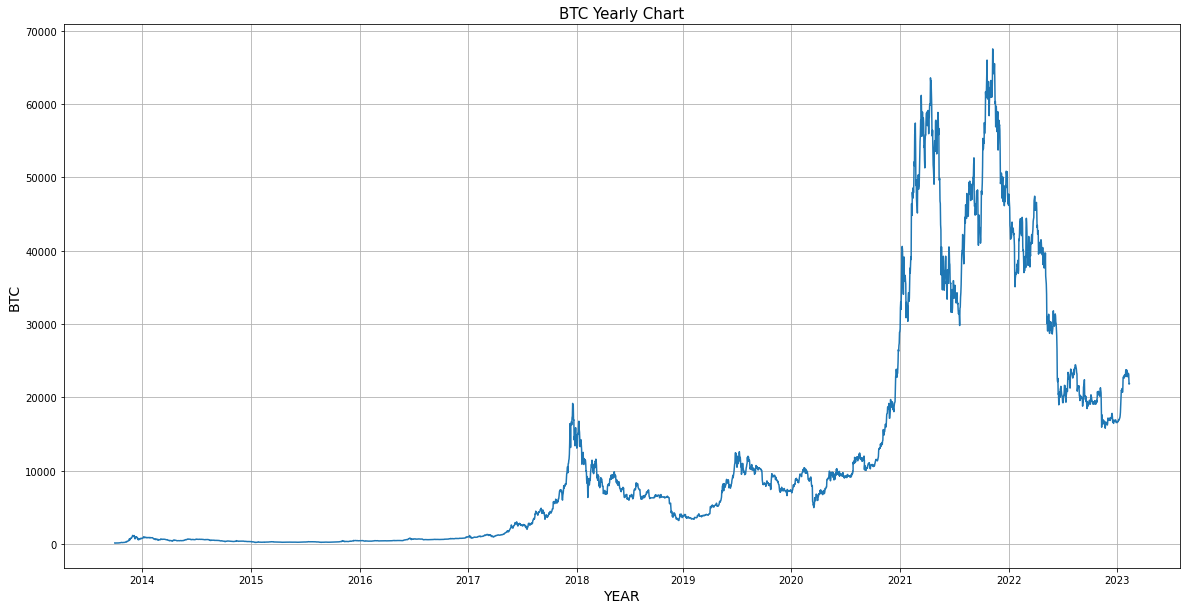

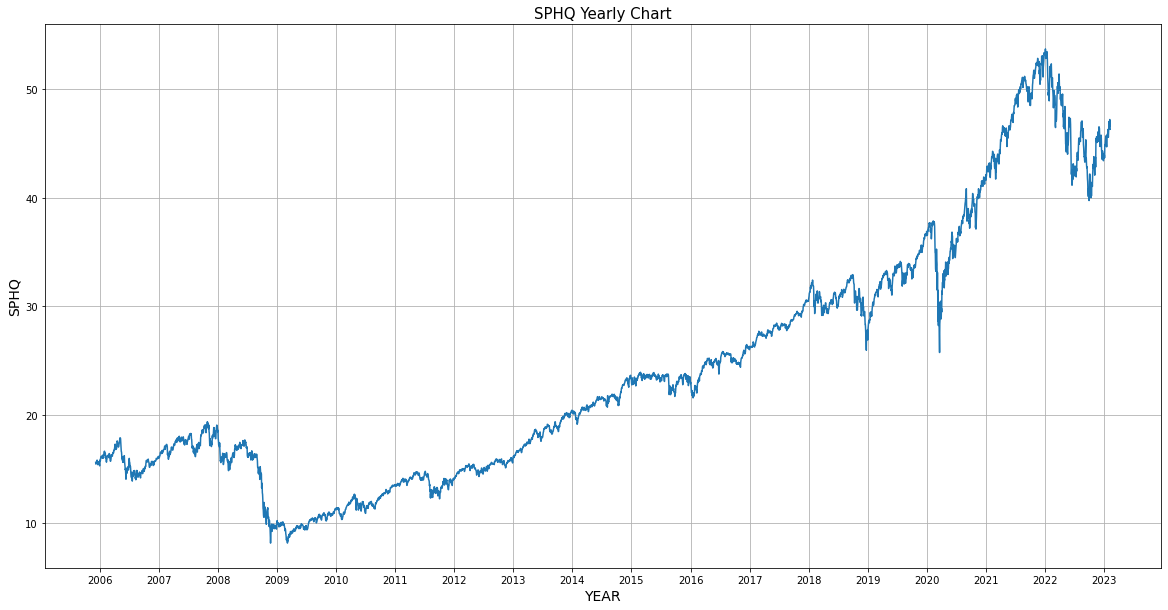

In [13]:
date_close_plot(bitcoin_df)
date_close_plot(sp500_df)

In [14]:
# Bitcoin & SP500
btc_sp500_df = bitcoin_df.merge(sp500_df,how='inner',on = 'date')
btc_sp500_df2 = btc_sp500_df.rename(columns = {'close_x':"btc close", 'close_y':"sp500 close"})
clean_btc_sp_df = btc_sp500_df2[['date','btc close','sp500 close']]
clean_btc_sp_df

,date,btc close,sp500 close
0,2013-10-01,123.65499,18.90
1,2013-10-02,125.45500,18.83
2,2013-10-03,108.58483,18.66
3,2013-10-04,118.67466,18.76
4,2013-10-07,121.79500,18.64
...,...,...,...
2428,2023-02-03,23431.90000,46.78
2429,2023-02-06,22762.52000,46.53
2430,2023-02-07,23240.46000,47.21
2431,2023-02-08,22963.00000,46.58


In [15]:
gold_df2 = gold_df.loc[gold_df['date'] > '2010-01-01']
sp500_df2 = sp500_df.loc[sp500_df['date'] > '2010-01-01']

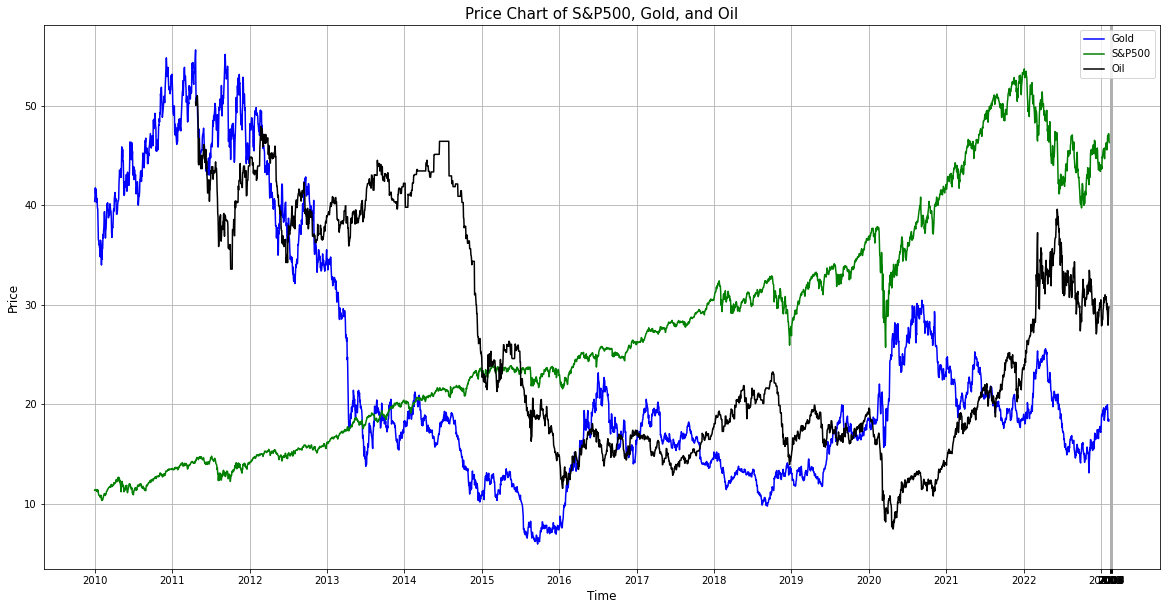

In [16]:
plt.figure(figsize = (20,10))
plt.plot(gold_df2['date'],gold_df2['close'], color = 'blue', label = "Gold")
plt.plot(sp500_df2['date'],sp500_df2['close'], color = 'green', label = "S&P500")
plt.plot(oil_df['date'],oil_df['close'], color = 'black', label = "Oil")

labels = []
ticks = []

prev = pd.Timestamp(gold_df['date'][0]) ##
prev_year = prev.year 
count = 0

for row in gold_df['date']: ##

    date = pd.Timestamp(row)
    year = date.year

    if year != prev_year:
        labels.append(year)
        ticks.append(row)

    prev_year = year

plt.xticks(ticks, labels = labels)
plt.legend(loc = 'best')

plt.xlabel("Time",size = 12)
plt.ylabel("Price", size = 12)
plt.title("Price Chart of S&P500, Gold, and Oil", size = 15)
plt.grid()
plt.show()

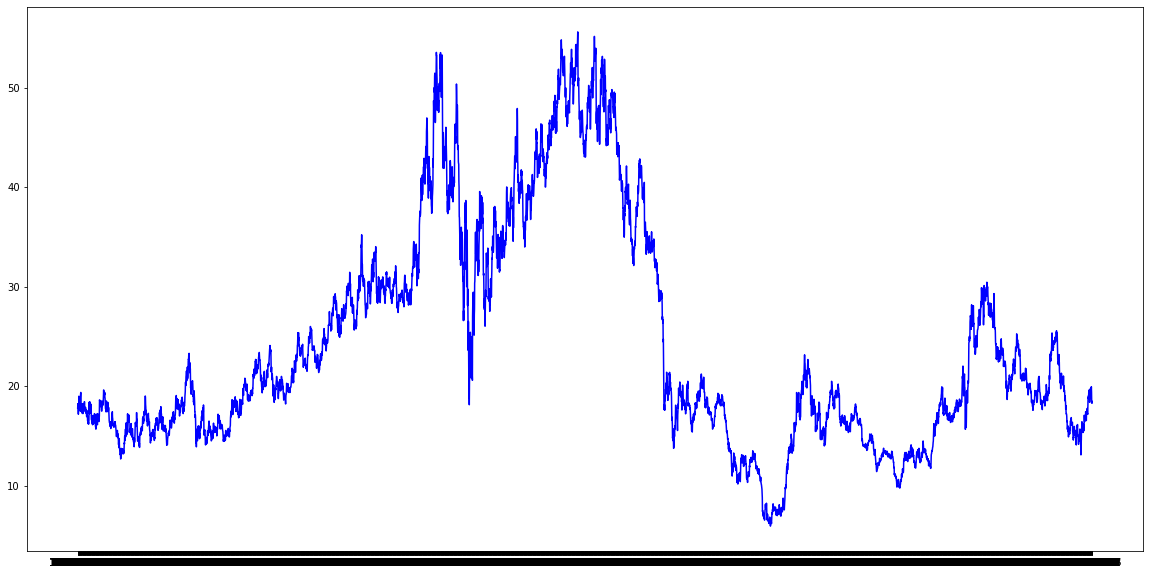

In [17]:
plt.figure(figsize = (20,10))
plt.plot(gold_df['date'],gold_df['close'], color = 'blue', label = "Gold")
plt.show()

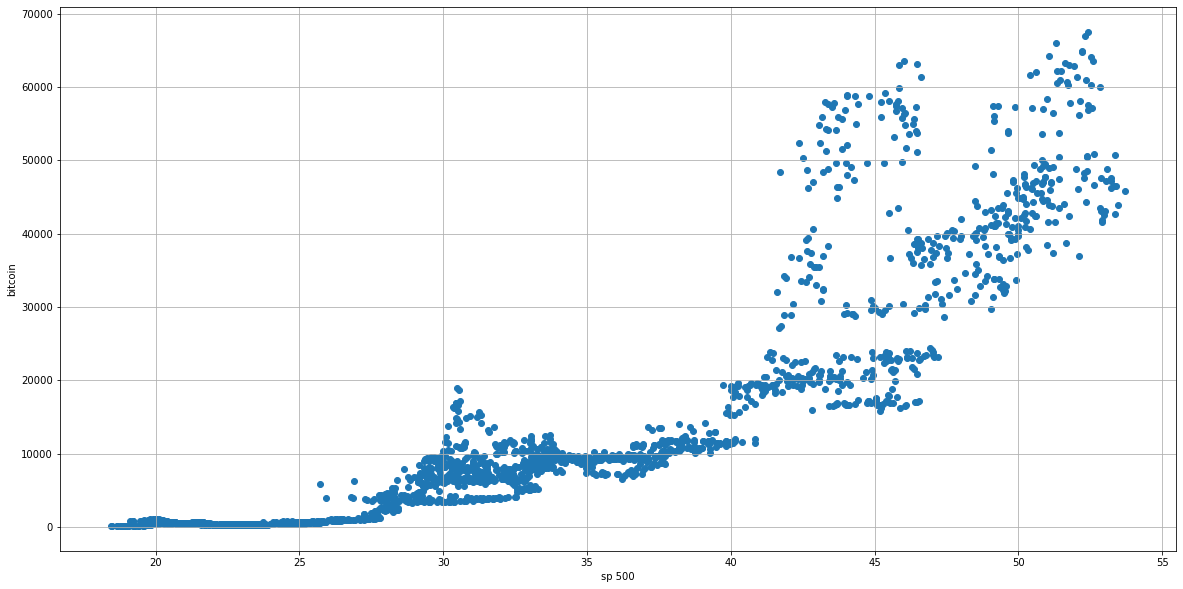

In [18]:
# def date_close_plot(data_frame):
# labels = []
# ticks = []

# prev = pd.Timestamp(data_frame['date'][0])
# prev_year = prev.year ##
# count = 0

# for row in data_frame['date']: ##

#     date = pd.Timestamp(row)
#     year = date.year

#     if year != prev_year:
#         labels.append(year)
#         ticks.append(row)

#     prev_year = year


# Creating the Time Series chart.
x_values = clean_btc_sp_df["sp500 close"] ##
y_values = clean_btc_sp_df["btc close"] ##

plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values)
# plt.xticks(ticks, labels = labels)

plt.title("")
plt.xlabel("sp 500")
plt.ylabel("bitcoin")

plt.grid()
plt.show()


In [19]:
gold_sp500_df = bitcoin_df.merge(sp500_df,how='inner',on = 'date')
gold_sp500_df = gold_sp500_df.rename(columns = {'daily change (%)_x':"btc daily change", 'daily change (%)_y':"sp500 daily change"})
gold_sp500_df = gold_sp500_df[['date','btc daily change','sp500 daily change']]

gold_sp500_df

,date,btc daily change,sp500 daily change
0,2013-10-01,-0.522643,0.531915
1,2013-10-02,1.455671,0.053135
2,2013-10-03,-13.447188,-0.638978
3,2013-10-04,9.292118,0.374532
4,2013-10-07,0.944567,0.107411
...,...,...,...
2428,2023-02-03,-0.244494,0.171306
2429,2023-02-06,-0.742993,-0.021487
2430,2023-02-07,2.099680,1.658053
2431,2023-02-08,-1.202198,-0.956836


The Stadard error of regression is 0.07


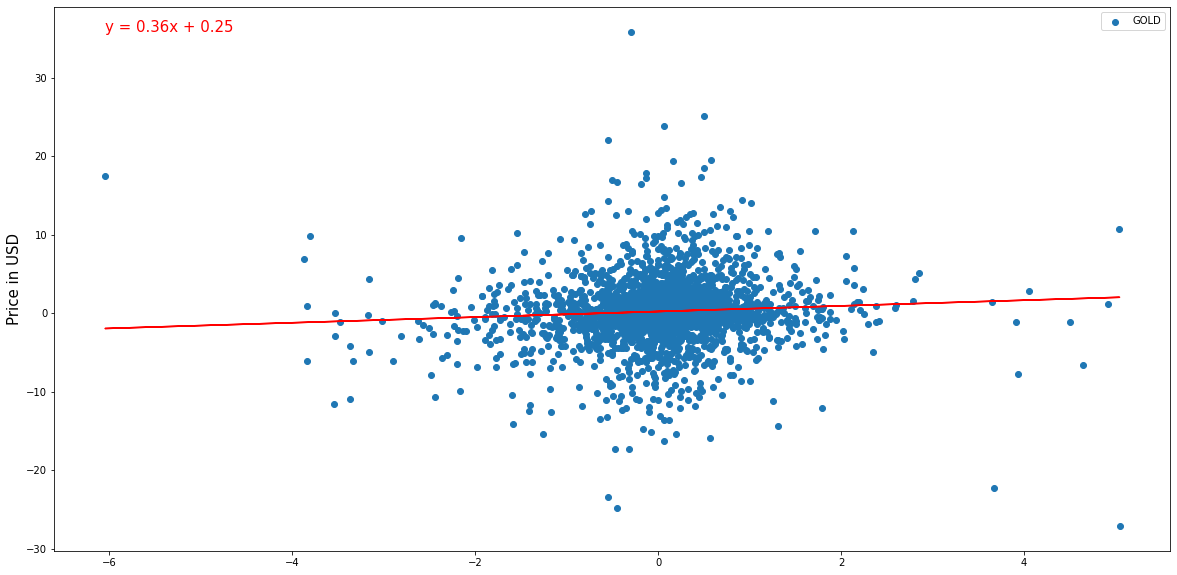

In [20]:
x2 = gold_sp500_df['date']
y2 = gold_sp500_df["btc daily change"]

x3 = gold_sp500_df['date']
y3 = gold_sp500_df["sp500 daily change"]





plt.figure(figsize=(20,10))

# plt.plot(x, y, label='OIL')
plt.scatter(y3, y2, label='GOLD')
# plt.plot(x3, y3, label='SPHQ')

x_values = y3
y_values = y2

# plt.figure(figsize = (20,10))
# plt.plot(y_values)


slope, interception, r_value, p_value, std_err = st.linregress(x_values, y_values)

line_eq = x_values * slope + interception
plt.plot(x_values, line_eq, color = 'r')
line_equation = f"y = {round(slope,2)}x + {round(interception,2)}"
plt.annotate(line_equation,(min(x_values),max(y_values)),fontsize = 15, color = 'red')

print(f"The Stadard error of regression is {round(st.pearsonr(x_values,y_values)[0],2)}")

plt.legend(loc='upper right')

plt.ylabel("Price in USD", fontsize=15)


plt.show()


The correlation coefficient between OIL and BTC is 0.01


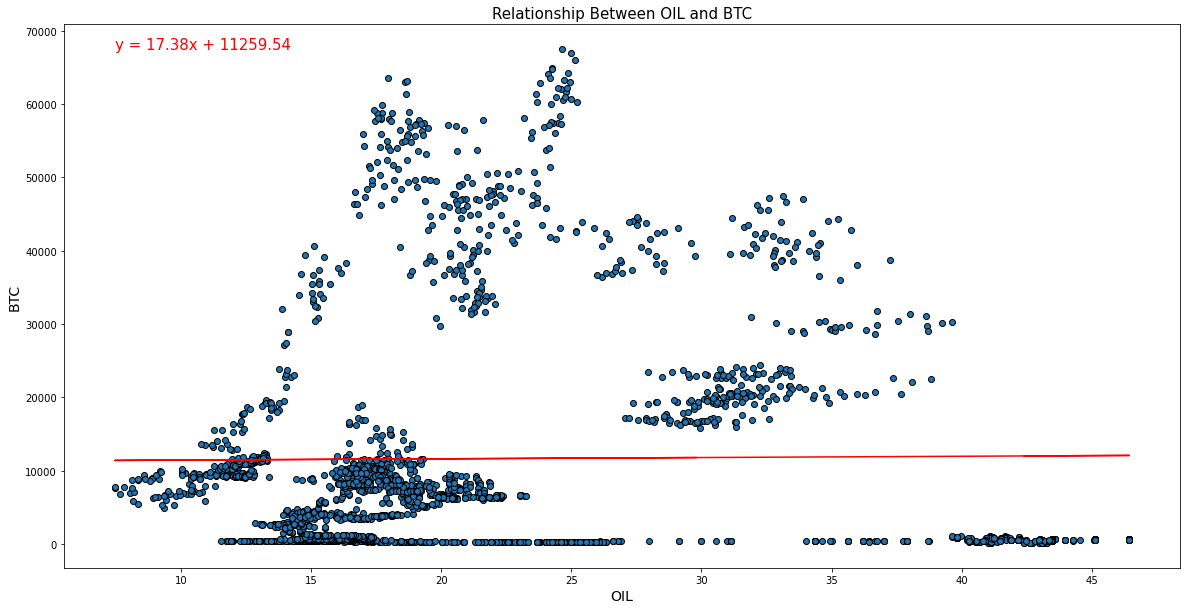

In [21]:
join_and_graph(oil_df,bitcoin_df)

The correlation coefficient between SPHQ and BTC is 0.88


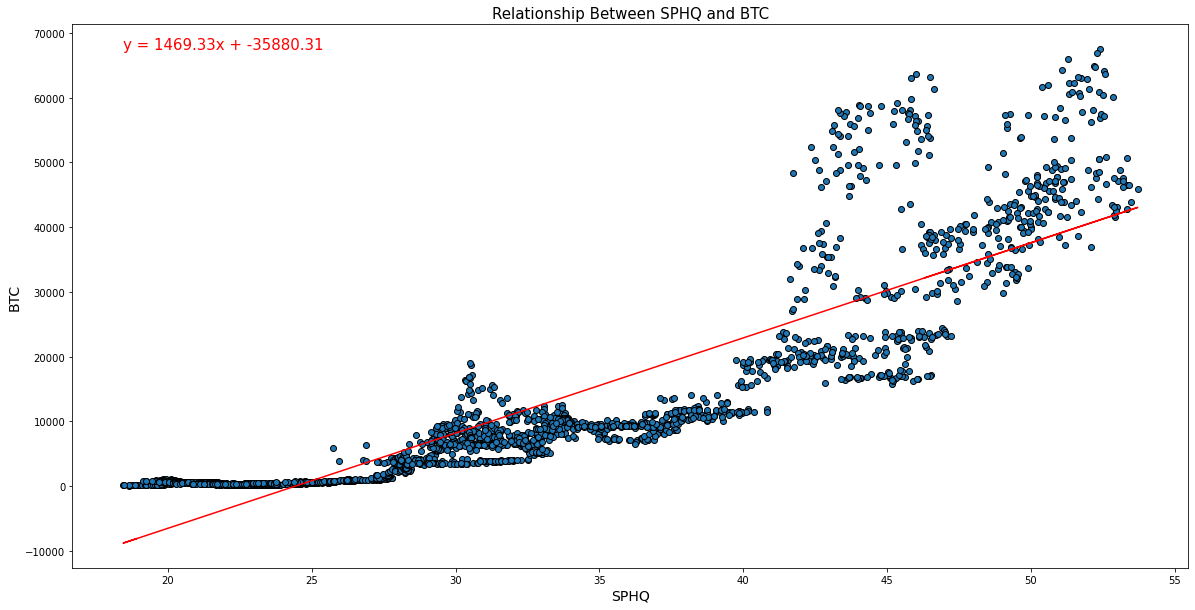

In [22]:
join_and_graph(sp500_df,bitcoin_df)

The correlation coefficient between GOLD and BTC is 0.39


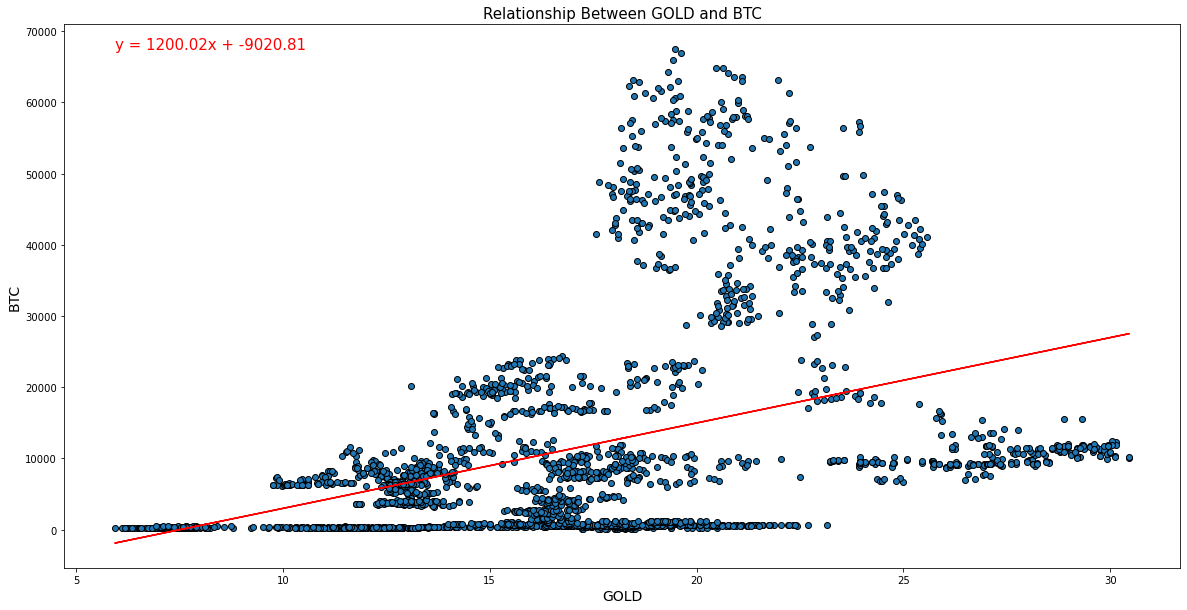

In [23]:
join_and_graph(gold_df,bitcoin_df)

In [24]:
bitcoin_6month_df = bitcoin_df.iloc[183:3526,:]
bitcoin_6month_df = bitcoin_6month_df.reset_index()

In [25]:
compare_btc_df = bitcoin_df.join(bitcoin_6month_df,rsuffix = "_six")
compare_btc_df = compare_btc_df.dropna()

In [26]:
compare_btc_df

,date,symbol,open,high,low,close,daily change (%),index,date_six,symbol_six,open_six,high_six,low_six,close_six,daily change (%)_six
0,2013-10-01,BTC,124.30466,124.75166,122.56349,123.65499,-0.522643,183.0,2014-04-02,BTC,464.88000,500.64066,459.67830,480.16581,3.288120
1,2013-10-02,BTC,123.65499,125.75850,123.63383,125.45500,1.455671,184.0,2014-04-03,BTC,480.16581,494.98333,419.70500,427.87498,-10.890161
2,2013-10-03,BTC,125.45500,125.66566,83.32833,108.58483,-13.447188,185.0,2014-04-04,BTC,427.87498,456.34863,414.41333,432.99716,1.197121
3,2013-10-04,BTC,108.58483,118.67500,107.05816,118.67466,9.292118,186.0,2014-04-05,BTC,432.99716,455.99333,428.63000,453.87148,4.820891
4,2013-10-05,BTC,118.67466,121.93633,118.00566,121.33866,2.244793,187.0,2014-04-06,BTC,453.87148,465.63773,444.13629,462.44500,1.888975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2022-08-06,BTC,23313.56000,23354.36000,22909.52000,22954.21000,-1.541378,3521.0,2023-02-05,BTC,23327.66000,23433.33000,22743.00000,22932.91000,-1.692197
3339,2022-08-07,BTC,22954.21000,23402.00000,22844.62000,23174.39000,0.959214,3522.0,2023-02-06,BTC,22932.91000,23158.25000,22628.13000,22762.52000,-0.742993
3340,2022-08-08,BTC,23174.39000,24245.00000,23154.25000,23810.00000,2.742726,3523.0,2023-02-07,BTC,22762.52000,23350.25000,22745.78000,23240.46000,2.099680
3341,2022-08-09,BTC,23810.98000,23933.25000,22865.00000,23149.95000,-2.776156,3524.0,2023-02-08,BTC,23242.42000,23452.00000,22665.85000,22963.00000,-1.202198


In [27]:
price_dif_df = round(100 * (compare_btc_df["close_six"] - compare_btc_df["close"])/compare_btc_df["close"],2)
compare_btc_df["six_months_dif (%)"] = price_dif_df

In [28]:
compare_btc_df[["date","six_months_dif (%)"]]

,date,six_months_dif (%)
0,2013-10-01,288.31
1,2013-10-02,241.06
2,2013-10-03,298.76
3,2013-10-04,282.45
4,2013-10-05,281.12
...,...,...
3338,2022-08-06,-0.09
3339,2022-08-07,-1.78
3340,2022-08-08,-2.39
3341,2022-08-09,-0.81


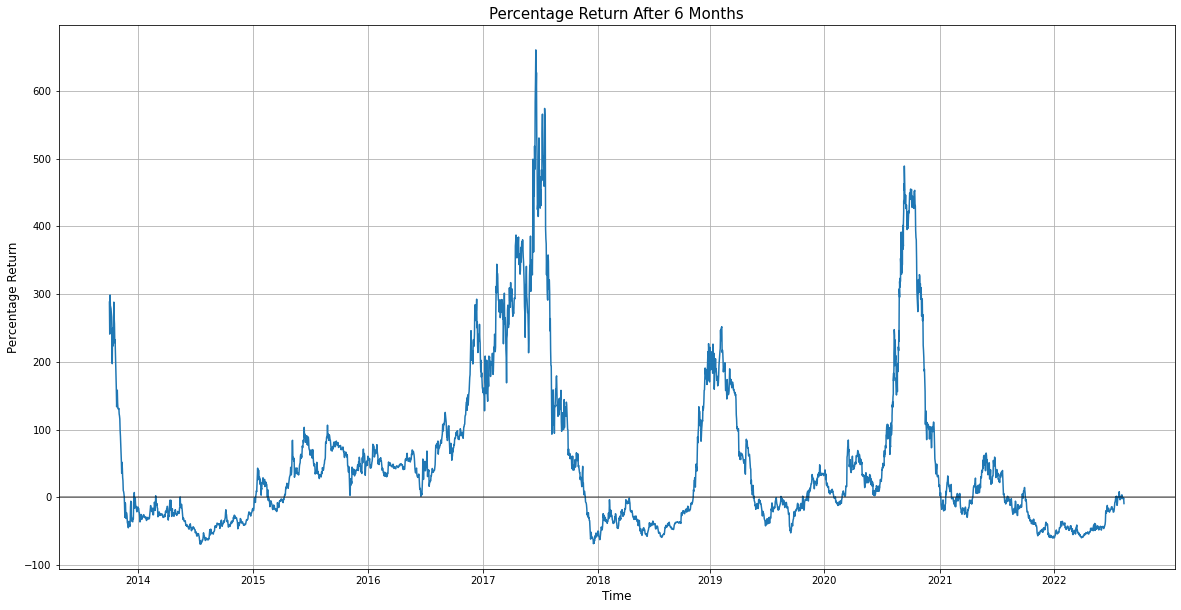

In [29]:
plt.figure(figsize = (20,10))
plt.plot(compare_btc_df["date"],compare_btc_df["six_months_dif (%)"])

labels = []
ticks = []

prev = pd.Timestamp(compare_btc_df['date'][0])
prev_year = prev.year ##
count = 0

for row in compare_btc_df['date']: ##

    date = pd.Timestamp(row)
    year = date.year

    if year != prev_year:
        labels.append(year)
        ticks.append(row)

    prev_year = year

plt.xticks(ticks, labels = labels)
plt.axhline(y=0,color = 'black',alpha = 0.5)

plt.xlabel("Time", size = 12)
plt.ylabel("Percentage Return", size = 12)
plt.title("Percentage Return After 6 Months", size = 15)
plt.grid()
plt.show()

This visualization shows in percentage how much return there is for each day since 2018 if the Bitcoin amount was sold exactly six months after it was bought. Meaning, if an investment is made for six months in Bitcoin, there is the posibility of making great profits, as we see the peaks in the visualization, from 100% to more than 600%. However, it is clear that a good proportion of the time the returns are negative, incurring losses. The proportion is that 57.16% of the time it would result in profits and 42.84% of the time it would result in losses. That indicates, Bitcoin is moderate or risky for short-term investment.

In [30]:
profit = compare_btc_df.loc[compare_btc_df["six_months_dif (%)"] > 0]
loss = compare_btc_df.loc[compare_btc_df["six_months_dif (%)"] <= 0]

In [31]:
n_profit = len(profit)
n_loss = len(loss)
total = n_profit + n_loss
percent_profit = round(100*n_profit/total,2)
percent_loss = round(100 - percent_profit,2)
print(f"An investment of 6 months in a random date has the chance for profit {percent_profit}% of the time and for loss {percent_loss}% of the time.")

An investment of 6 months in a random date has the chance for profit 57.16% of the time and for loss 42.84% of the time.


In [32]:
btc_5yr_df = bitcoin_df.loc[bitcoin_df["date"] >= '2018-01-01']

In [33]:
btc_5yr_df = btc_5yr_df.reset_index()

In [34]:
btc_5yr_df

,index,date,symbol,open,high,low,close,daily change (%)
0,1553,2018-01-01,BTC,13062.14500,14213.44125,12587.60375,13439.41750,2.888289
1,1554,2018-01-02,BTC,13439.41750,13892.24250,12859.80250,13337.62125,-0.757445
2,1555,2018-01-03,BTC,13337.62125,15216.75625,12955.96500,14881.54500,11.575705
3,1556,2018-01-04,BTC,14881.54500,15394.98625,14588.59500,15104.45000,1.497862
4,1557,2018-01-05,BTC,15104.45000,15194.40625,14225.16625,14953.85250,-0.997041
...,...,...,...,...,...,...,...,...
1969,3522,2023-02-06,BTC,22932.91000,23158.25000,22628.13000,22762.52000,-0.742993
1970,3523,2023-02-07,BTC,22762.52000,23350.25000,22745.78000,23240.46000,2.099680
1971,3524,2023-02-08,BTC,23242.42000,23452.00000,22665.85000,22963.00000,-1.202198
1972,3525,2023-02-09,BTC,22961.85000,23011.39000,21688.00000,21796.35000,-5.075811


In [35]:
mean_5yr = btc_5yr_df["daily change (%)"].mean()
mean_5yr

0.11675531127975533

# SP500 5 YRS Percentage Change

In [62]:
sp500_5yr_df.head()

,date,symbol,open,high,low,close,daily change (%)
1257,2010-12-06,SPHQ,13.24,13.31,13.21,13.25,0.075529
1258,2010-12-07,SPHQ,13.39,13.39,13.25,13.25,-1.045556
1259,2010-12-08,SPHQ,13.25,13.30,13.22,13.27,0.150943
1260,2010-12-09,SPHQ,13.34,13.34,13.27,13.29,-0.374813
1261,2010-12-10,SPHQ,13.37,13.38,13.29,13.38,0.074794


In [65]:
sp500_5yr_df = sp500_df.loc[sp500_df["date"] >= '2010-12-06']
sp500_5yr_df2 = sp500_5yr_df.reset_index()
sp500_5yr_return_df = sp500_df.join(sp500_5yr_df2,rsuffix = "_five")

sp500_5yr_return_df = sp500_5yr_return_df.dropna()

In [66]:
sp500_5yr_return_df.head()


,date,symbol,open,high,low,close,daily change (%),index,date_five,symbol_five,open_five,high_five,low_five,close_five,daily change (%)_five
0,2005-12-06,SPHQ,15.47,15.69,15.470,15.60,0.840336,1257.0,2010-12-06,SPHQ,13.24,13.31,13.21,13.25,0.075529
1,2005-12-07,SPHQ,15.60,15.62,15.420,15.44,-1.025641,1258.0,2010-12-07,SPHQ,13.39,13.39,13.25,13.25,-1.045556
2,2005-12-08,SPHQ,15.45,15.58,15.439,15.52,0.453074,1259.0,2010-12-08,SPHQ,13.25,13.30,13.22,13.27,0.150943
3,2005-12-09,SPHQ,15.59,15.74,15.470,15.57,-0.128287,1260.0,2010-12-09,SPHQ,13.34,13.34,13.27,13.29,-0.374813
4,2005-12-12,SPHQ,15.75,15.80,15.590,15.67,-0.507937,1261.0,2010-12-10,SPHQ,13.37,13.38,13.29,13.38,0.074794


# 5 yrs difference percentage

In [67]:
price_dif_df = round(100 * (sp500_5yr_return_df["close_five"] - sp500_5yr_return_df["close"])/sp500_5yr_return_df["close"],2)
sp500_5yr_return_df["5yrs_dif (%)"] = price_dif_df
sp500_5yr_return_df.head()

,date,symbol,open,high,low,close,daily change (%),index,date_five,symbol_five,open_five,high_five,low_five,close_five,daily change (%)_five,5yrs_dif (%)
0,2005-12-06,SPHQ,15.47,15.69,15.470,15.60,0.840336,1257.0,2010-12-06,SPHQ,13.24,13.31,13.21,13.25,0.075529,-15.06
1,2005-12-07,SPHQ,15.60,15.62,15.420,15.44,-1.025641,1258.0,2010-12-07,SPHQ,13.39,13.39,13.25,13.25,-1.045556,-14.18
2,2005-12-08,SPHQ,15.45,15.58,15.439,15.52,0.453074,1259.0,2010-12-08,SPHQ,13.25,13.30,13.22,13.27,0.150943,-14.50
3,2005-12-09,SPHQ,15.59,15.74,15.470,15.57,-0.128287,1260.0,2010-12-09,SPHQ,13.34,13.34,13.27,13.29,-0.374813,-14.64
4,2005-12-12,SPHQ,15.75,15.80,15.590,15.67,-0.507937,1261.0,2010-12-10,SPHQ,13.37,13.38,13.29,13.38,0.074794,-14.61


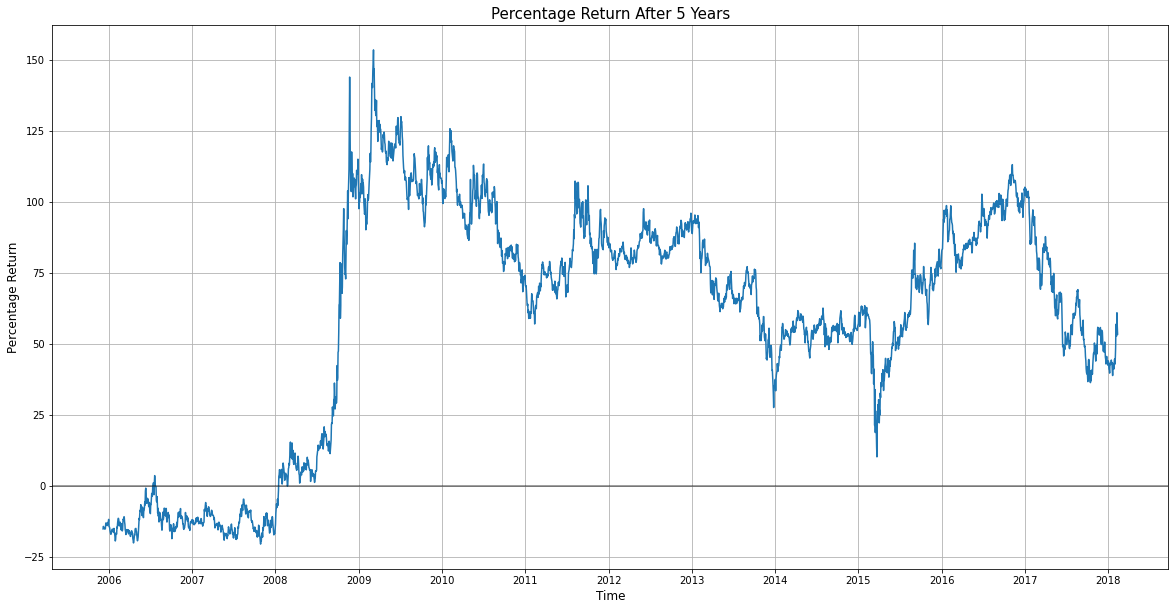

In [68]:
plt.figure(figsize = (20,10))
plt.plot(sp500_5yr_return_df["date"],sp500_5yr_return_df["5yrs_dif (%)"])

labels = []
ticks = []

prev = pd.Timestamp(sp500_5yr_return_df['date'][0])
prev_year = prev.year ##
count = 0

for row in sp500_5yr_return_df['date']: ##

    date = pd.Timestamp(row)
    year = date.year

    if year != prev_year:
        labels.append(year)
        ticks.append(row)

    prev_year = year

plt.xticks(ticks, labels = labels)
plt.axhline(y=0,color = 'black',alpha = 0.5)

plt.xlabel("Time", size = 12)
plt.ylabel("Percentage Return", size = 12)
plt.title("Percentage Return After 5 Years", size = 15)
plt.grid()
plt.show()

The Stadard error of regression is 0.4963021708979596


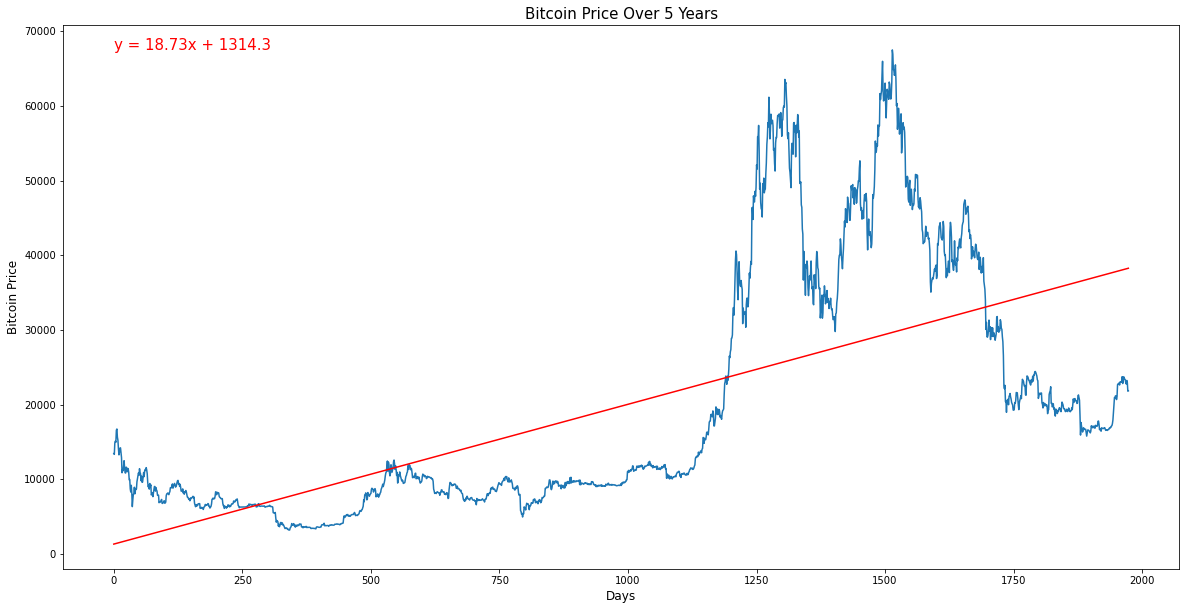

In [36]:
x_values = btc_5yr_df.index
y_values = btc_5yr_df["close"]


plt.figure(figsize = (20,10))
plt.plot(y_values)


slope, interception, r_value, p_value, std_err = st.linregress(x_values, y_values)

line_eq = x_values * slope + interception
plt.plot(x_values, line_eq, color = 'r')
line_equation = f"y = {round(slope,2)}x + {round(interception,2)}"
plt.annotate(line_equation,(min(x_values),max(y_values)),fontsize = 15, color = 'red')
plt.title("Bitcoin Price Over 5 Years", size = 15)
plt.xlabel("Days", size = 12)
plt.ylabel("Bitcoin Price", size = 12)
print(f"The Stadard error of regression is {std_err}")
#     plt.grid()
plt.show()

In [37]:
y_values = btc_5yr_df["daily change (%)"]

In [38]:
z_score = st.zscore(y_values)

In [39]:
z_score_list = []
for x in z_score:
    if abs(x) >= 1.8:
        z_score_list.append(x)
    

In [40]:
clean_btc_sp_df.tail()

,date,btc close,sp500 close
2428,2023-02-03,23431.90,46.78
2429,2023-02-06,22762.52,46.53
2430,2023-02-07,23240.46,47.21
2431,2023-02-08,22963.00,46.58
2432,2023-02-09,21796.35,46.31


In [41]:
btc_sp_2020_df = clean_btc_sp_df.loc[clean_btc_sp_df["date"] > '2020-02-09']

y = 2338.57x + -73306.26
The Correlation is 0.82


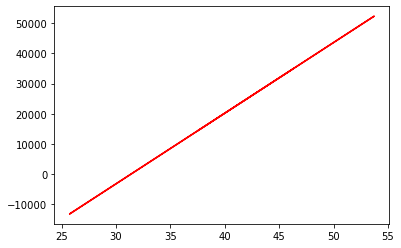

In [42]:
x_values = btc_sp_2020_df["sp500 close"]
y_values = btc_sp_2020_df["btc close"]

slope, interception, r_value, p_value, std_err = st.linregress(x_values, y_values)

line_eq = x_values * slope + interception
plt.plot(x_values, line_eq, color = 'r')
line_equation = f"y = {round(slope,2)}x + {round(interception,2)}"
# plt.annotate(line_equation,(min(x_values),max(y_values)),fontsize = 15, color = 'red')
# plt.title("Bitcoin Price Over 5 Years", size = 15)
# plt.xlabel("Days", size = 12)
# plt.ylabel("Bitcoin Price", size = 12)

print(line_equation)
print(f"The Correlation is {round(st.pearsonr(x_values,y_values)[0],2)}")

In [43]:
btc_sp_2017_df = clean_btc_sp_df.loc[(clean_btc_sp_df["date"] > '2021-02-09') & (clean_btc_sp_df["date"] <= '2022-02-09')]

y = -157.73x + 55659.84
The Correlation is -0.05


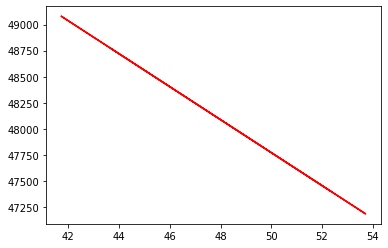

In [44]:
x_values = btc_sp_2017_df["sp500 close"]
y_values = btc_sp_2017_df["btc close"]

slope, interception, r_value, p_value, std_err = st.linregress(x_values, y_values)

line_eq = x_values * slope + interception
plt.plot(x_values, line_eq, color = 'r')
line_equation = f"y = {round(slope,2)}x + {round(interception,2)}"

print(line_equation)
print(f"The Correlation is {round(st.pearsonr(x_values,y_values)[0],2)}")